In [34]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
!pip install catboost
!pip install river

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import catboost as cbt
import xgboost as xgb
import time
from river import stream
from statistics import mode

In [37]:
df = pd.read_csv("/content/CAN Intrusion detection sampled data_new.csv")

In [38]:
df

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,1201,41,39,39,35,0,0,0,154,0
1,809,64,187,127,20,17,32,0,20,0
2,1349,216,0,0,136,0,0,0,0,0
3,1201,41,39,39,35,0,0,0,154,0
4,2,0,0,0,0,0,3,2,228,0
...,...,...,...,...,...,...,...,...,...,...
818435,848,5,32,52,104,117,0,0,12,0
818436,1088,255,0,0,0,255,134,9,0,0
818437,848,5,32,100,104,117,0,0,92,0
818438,1349,216,90,0,137,0,0,0,0,0


In [39]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [40]:
df

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,1201,41,39,39,35,0,0,0,154,0
1,809,64,187,127,20,17,32,0,20,0
2,1349,216,0,0,136,0,0,0,0,0
3,1201,41,39,39,35,0,0,0,154,0
4,2,0,0,0,0,0,3,2,228,0
...,...,...,...,...,...,...,...,...,...,...
818435,848,5,32,52,104,117,0,0,12,0
818436,1088,255,0,0,0,255,134,9,0,0
818437,848,5,32,100,104,117,0,0,92,0
818438,1349,216,90,0,137,0,0,0,0,0


In [41]:
df.Label.value_counts()

0    701832
1     32539
2     29944
4     29501
3     24624
Name: Label, dtype: int64

In [42]:
X = df.drop(['Label'],axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [43]:
pd.Series(y_train).value_counts()

0    561793
1     25904
2     23827
4     23565
3     19663
Name: Label, dtype: int64

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    140039
           1       1.00      1.00      1.00      6635
           2       1.00      1.00      1.00      6117
           3       1.00      1.00      1.00      4961
           4       1.00      1.00      1.00      5936

    accuracy                           1.00    163688
   macro avg       1.00      1.00      1.00    163688
weighted avg       1.00      1.00      1.00    163688

Accuracy of LightGBM: 0.9999877816333512
Precision of LightGBM: 0.9999877818078482
Recall of LightGBM: 0.9999877816333512
Average F1 of LightGBM: 0.9999877804452856
F1 of LightGBM for each type of attack: [0.99999286 1.         1.         0.99979839 1.        ]


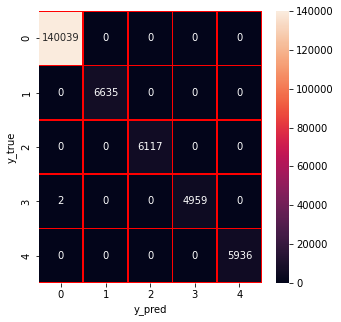

CPU times: user 51.4 s, sys: 383 ms, total: 51.8 s
Wall time: 1min 1s


In [44]:
%%time
# Train the LightGBM algorithm
import lightgbm as lgb
lg = lgb.LGBMClassifier()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy of LightGBM: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of LightGBM: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of LightGBM: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of LightGBM: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of LightGBM for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
lg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    140039
           1       1.00      1.00      1.00      6635
           2       1.00      1.00      1.00      6117
           3       1.00      1.00      1.00      4961
           4       1.00      1.00      1.00      5936

    accuracy                           1.00    163688
   macro avg       1.00      1.00      1.00    163688
weighted avg       1.00      1.00      1.00    163688

Accuracy of XGBoost: 0.9998594887835394
Precision of XGBoost: 0.9998594271047018
Recall of XGBoost: 0.9998594887835394
Average F1 of XGBoost: 0.9998593861733049
F1 of XGBoost for each type of attack: [0.99991788 1.         1.         0.99767841 1.        ]


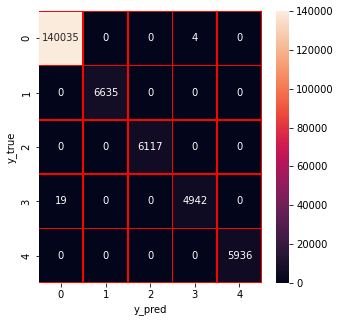

CPU times: user 3min 36s, sys: 518 ms, total: 3min 36s
Wall time: 3min 49s


In [45]:
%%time
# Train the XGBoost algorithm
import xgboost as xgb
xg = xgb.XGBClassifier()

X_train_x = X_train.values
X_test_x = X_test.values

xg.fit(X_train_x, y_train)

y_pred = xg.predict(X_test_x)
print(classification_report(y_test,y_pred))
print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of XGBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
xg_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    140039
           1       1.00      1.00      1.00      6635
           2       1.00      1.00      1.00      6117
           3       1.00      1.00      1.00      4961
           4       1.00      1.00      1.00      5936

    accuracy                           1.00    163688
   macro avg       1.00      1.00      1.00    163688
weighted avg       1.00      1.00      1.00    163688

Accuracy of CatBoost: 0.9999755632667026
Precision of CatBoost: 0.9999755639646806
Recall of CatBoost: 0.9999755632667026
Average F1 of CatBoost: 0.9999755585134452
F1 of CatBoost for each type of attack: [0.99998572 1.         1.         0.99959669 1.        ]


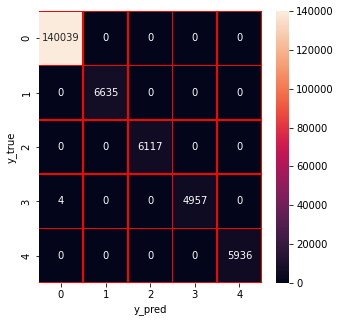

CPU times: user 12min 18s, sys: 8.21 s, total: 12min 26s
Wall time: 7min 55s


In [46]:
%%time
# Train the CatBoost algorithm
import catboost as cbt
cb = cbt.CatBoostClassifier(verbose=0,boosting_type='Plain')
#cb = cbt.CatBoostClassifier()

cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy of CatBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of CatBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of CatBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of CatBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of CatBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
cb_f1=f1_score(y_test, y_pred, average=None)

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [47]:
model=[]
for i in range(len(lg_f1)):
    if max(lg_f1[i],xg_f1[i],cb_f1[i]) == lg_f1[i]:
        model.append(lg)
    elif max(lg_f1[i],xg_f1[i],cb_f1[i]) == xg_f1[i]:
        model.append(xg)
    else:
        model.append(cb)

In [48]:
model

[LGBMClassifier(),
 LGBMClassifier(),
 LGBMClassifier(),
 LGBMClassifier(),
 LGBMClassifier()]

In [49]:
def LCCDE(X_test, y_test, m1, m2, m3):
    i = 0
    t = []
    m = []
    yt = []
    yp = []
    l = []
    pred_l = []
    pro_l = []

    # For each class (normal or a type of attack), find the leader model
    for xi, yi in stream.iter_pandas(X_test, y_test):

        xi2=np.array(list(xi.values()))
        y_pred1 = m1.predict(xi2.reshape(1, -1))      # model 1 (LightGBM) makes a prediction on text sample xi
        y_pred1 = int(y_pred1[0])
        y_pred2 = m2.predict(xi2.reshape(1, -1))      # model 2 (XGBoost) makes a prediction on text sample xi
        y_pred2 = int(y_pred2[0])
        y_pred3 = m3.predict(xi2.reshape(1, -1))      # model 3 (Catboost) makes a prediction on text sample xi
        y_pred3 = int(y_pred3[0])

        p1 = m1.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 1 
        p2 = m2.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 2  
        p3 = m3.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 3  

        # Find the highest prediction probability among all classes for each ML model
        y_pred_p1 = np.max(p1)
        y_pred_p2 = np.max(p2)
        y_pred_p3 = np.max(p3)

        if y_pred1 == y_pred2 == y_pred3: # If the predicted classes of all the three models are the same
            y_pred = y_pred1 # Use this predicted class as the final predicted class

        elif y_pred1 != y_pred2 != y_pred3: # If the predicted classes of all the three models are different
            # For each prediction model, check if the predicted class’s original ML model is the same as its leader model
            if model[y_pred1]==m1: # If they are the same and the leading model is model 1 (LightGBM)
                l.append(m1)
                pred_l.append(y_pred1) # Save the predicted class
                pro_l.append(y_pred_p1) # Save the confidence

            if model[y_pred2]==m2: # If they are the same and the leading model is model 2 (XGBoost)
                l.append(m2)
                pred_l.append(y_pred2)
                pro_l.append(y_pred_p2)

            if model[y_pred3]==m3: # If they are the same and the leading model is model 3 (CatBoost)
                l.append(m3)
                pred_l.append(y_pred3)
                pro_l.append(y_pred_p3)

            if len(l)==0: # Avoid empty probability list
                pro_l=[y_pred_p1,y_pred_p2,y_pred_p3]

            elif len(l)==1: # If only one pair of the original model and the leader model for each predicted class is the same
                y_pred=pred_l[0] # Use the predicted class of the leader model as the final prediction class

            else: # If no pair or multiple pairs of the original prediction model and the leader model for each predicted class are the same
                max_p = max(pro_l) # Find the highest confidence
                
                # Use the predicted class with the highest confidence as the final prediction class
                if max_p == y_pred_p1:
                    y_pred = y_pred1
                elif max_p == y_pred_p2:
                    y_pred = y_pred2
                else:
                    y_pred = y_pred3  
        
        else: # If two predicted classes are the same and the other one is different
            n = mode([y_pred1,y_pred2,y_pred3]) # Find the predicted class with the majority vote
            y_pred = model[n].predict(xi2.reshape(1, -1)) # Use the predicted class of the leader model as the final prediction class
            y_pred = int(y_pred[0]) 

        yt.append(yi)
        yp.append(y_pred) # Save the predicted classes for all tested samples
    return yt, yp


In [50]:
yt, yp = LCCDE(X_test, y_test, m1 = lg, m2 = xg, m3 = cb)

In [51]:
print("Accuracy of LCCDE: "+ str(accuracy_score(yt, yp)))
print("Precision of LCCDE: "+ str(precision_score(yt, yp, average='weighted')))
print("Recall of LCCDE: "+ str(recall_score(yt, yp, average='weighted')))
print("Average F1 of LCCDE: "+ str(f1_score(yt, yp, average='weighted')))
print("F1 of LCCDE for each type of attack: "+ str(f1_score(yt, yp, average=None)))

Accuracy of LCCDE: 0.9999877816333512
Precision of LCCDE: 0.9999877818078482
Recall of LCCDE: 0.9999877816333512
Average F1 of LCCDE: 0.9999877804452856
F1 of LCCDE for each type of attack: [0.99999286 1.         1.         0.99979839 1.        ]


In [52]:
print("F1 of LightGBM for each type of attack: "+ str(lg_f1))
print("F1 of XGBoost for each type of attack: "+ str(xg_f1))
print("F1 of CatBoost for each type of attack: "+ str(cb_f1))

F1 of LightGBM for each type of attack: [0.99999286 1.         1.         0.99979839 1.        ]
F1 of XGBoost for each type of attack: [0.99991788 1.         1.         0.99767841 1.        ]
F1 of CatBoost for each type of attack: [0.99998572 1.         1.         0.99959669 1.        ]
